In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv(r"C:\Users\HP\Desktop\datasets\customer churn INSAID\Churn.csv")

In [2]:
data_copy = pd.read_csv(r"C:\Users\HP\Desktop\datasets\customer churn INSAID\Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info() #it shows us that there aren't any null values in the data, so it is clean, also there are a lot of columns with the dtype 'Object', hence we have to these categorical variables to numerical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
temp_list = data.columns.tolist()
for col in temp_list:
    print(col, data[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [6]:
data.corr() #we have to convert the categorical data into numerical to see the correlation of all the columns

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


### Data Manipulation

In [7]:
data['gender'].replace({'Male':1, 'Female':0},inplace = True)
data['Partner'].replace({'Yes':1, 'No':0},inplace = True)
data['Dependents'].replace({'Yes':1, 'No':0},inplace = True)
data['PhoneService'].replace({'Yes':1, 'No':0},inplace = True)
data['PaperlessBilling'].replace({'Yes':1, 'No':0},inplace = True)
data['Churn'].replace({'Yes':1, 'No':0},inplace = True)
# Turning categorical to numerical in columns having only 2 distinct categorical values

In [8]:
data1 = data.copy() # I will try 2 approaches, first where I make categorical variables for columns having value 'No Internet Service' and second where I will replace 'No Internet Service' value with 'No' in the respective columns as 'No internet service' only means that they come under the 'No' category

In [9]:
data = pd.get_dummies(data,columns = ['MultipleLines'])
data = pd.get_dummies(data,columns =['InternetService'])
data = pd.get_dummies(data,columns =['OnlineSecurity'])
data = pd.get_dummies(data,columns =['OnlineBackup'])
data = pd.get_dummies(data,columns =['DeviceProtection'])
data = pd.get_dummies(data,columns =['TechSupport'])
data = pd.get_dummies(data,columns =['StreamingTV'])
data = pd.get_dummies(data,columns =['StreamingMovies'])
data = pd.get_dummies(data,columns =['Contract'])
data = pd.get_dummies(data,columns =['PaymentMethod'])
#Replacing categorical values with numerical values for first approach

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [11]:
data2 = data1.copy() #making copy of original data just for backup

In [12]:
data1['OnlineSecurity'].replace({'Yes':1, 'No':0, 'No internet service':0}, inplace = True)
data1['OnlineBackup'].replace({'Yes':1, 'No':0, 'No internet service':0}, inplace = True)
data1['DeviceProtection'].replace({'Yes':1, 'No':0, 'No internet service':0}, inplace = True)
data1['TechSupport'].replace({'Yes':1, 'No':0, 'No internet service':0}, inplace = True)
data1['StreamingTV'].replace({'Yes':1, 'No':0, 'No internet service':0}, inplace = True)
data1['StreamingMovies'].replace({'Yes':1, 'No':0, 'No internet service':0}, inplace = True)

In [13]:
data1 = pd.get_dummies(data1, columns = ['MultipleLines'])
data1 = pd.get_dummies(data1, columns = ['InternetService'])
data1 = pd.get_dummies(data1, columns = ['Contract'])
data1 = pd.get_dummies(data1, columns = ['PaymentMethod'])

In [14]:
temp_list1 = data.columns.tolist()
for col in temp_list1:
    print(col, data[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
PaperlessBilling [1 0]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn [0 1]
MultipleLines_No [0 1]
MultipleLines_No phone service [1 0]
MultipleLines_Yes [0 1]
InternetService_DSL [1 0]
InternetService_Fiber optic [0 1]
InternetService_No [0 1]
OnlineSecurity_No [1 0]
OnlineSecurity_No internet service [0 1]
OnlineSecurity_Yes [0 1]
OnlineBackup_No [0 1]
OnlineBackup_No internet service [0 1]
OnlineBackup_Yes [1 0]
DeviceProtection_No [1 0]
DeviceProtection_No internet service [0 1]
DeviceProtectio

### Data Visualization

<AxesSubplot:>

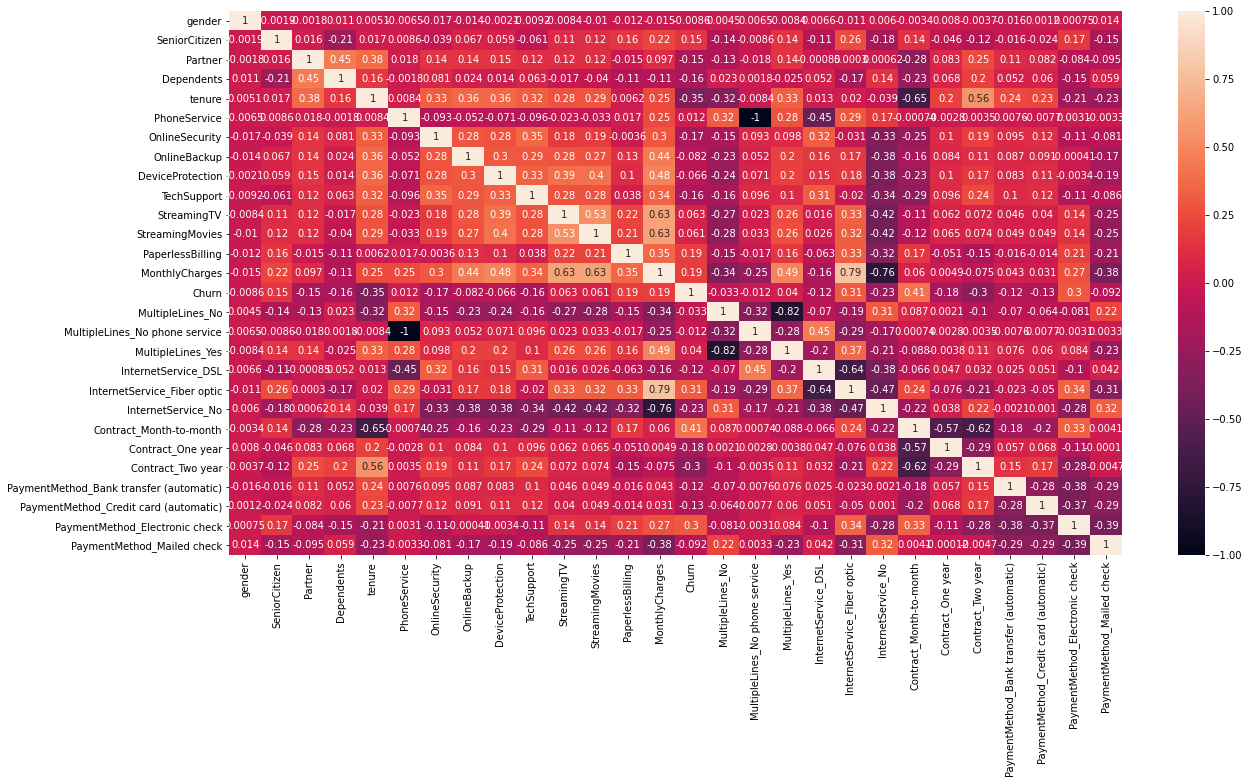

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(data1.corr(), annot = True)

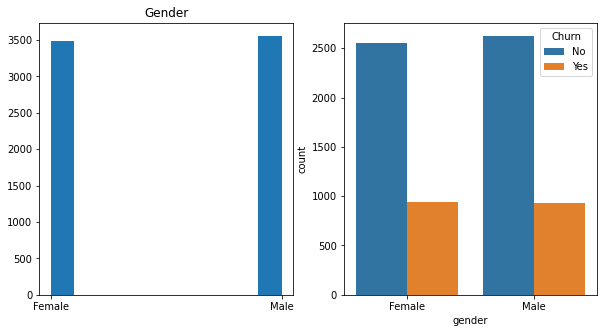

In [17]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Gender')
plt.hist(x = data_copy['gender'])
plt.subplot(1,2,2)
sns.countplot(x = data_copy['gender'], hue = data_copy['Churn'])
plt.show()
#there are almost equal number of male and female entries and the churn rate if also almost equal for both the genders

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

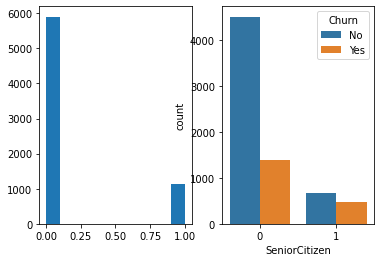

In [18]:
plt.subplot(1,2,1)
plt.hist(data_copy['SeniorCitizen'])
plt.subplot(1,2,2)
sns.countplot(x = data_copy['SeniorCitizen'], hue = data_copy['Churn'])
# a major portion of subscribers are not senior citizens, and those who are senior citizens are mostly retained by the company, so there isn't any problem in this segment. Also, more than 60% of the non senior citizen type customers are retained which is also a good sign

<AxesSubplot:xlabel='InternetService', ylabel='count'>

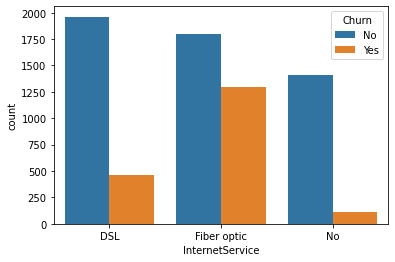

In [19]:
sns.countplot(x = data_copy['InternetService'], hue = data_copy['Churn'])
# the company is loosing most of its customers who have a fiber optic connection, which indicates there must be a problem with that service

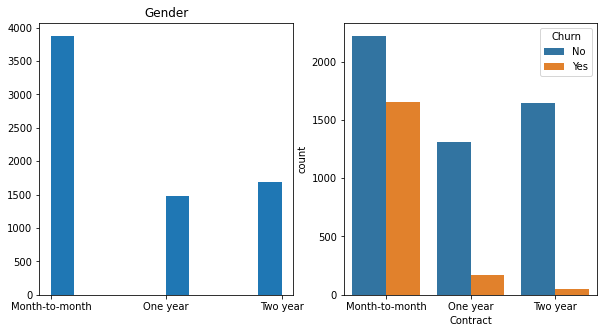

In [20]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Gender')
plt.hist(x = data_copy['Contract'])
plt.subplot(1,2,2)
sns.countplot(x = data_copy['Contract'], hue = data_copy['Churn'])
plt.show()
# customers that have a month to month contract are more likely to leave the company than any other type of contracts. Since the major portion of the customers have month to month contract, it is a very important segment for the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

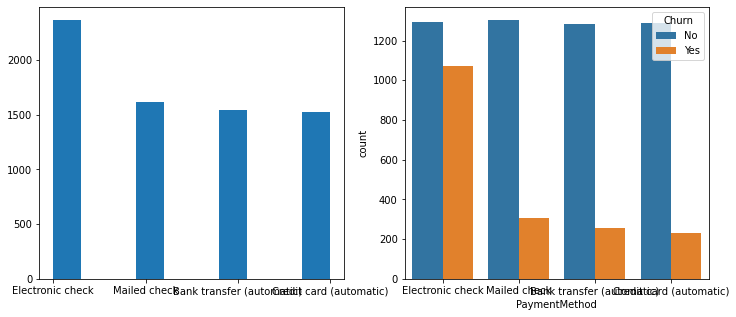

In [21]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.hist(data_copy['PaymentMethod'])
plt.subplot(1,2,2)
sns.countplot(x = data_copy['PaymentMethod'], hue = data_copy['Churn'])
#payment by electronic cheque is the most favoured method among customers and the company is losing most of the customers in that segment only

### Implement Machine Learning Models

In [41]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
customer_id = data['customerID'] #separating customerID column to avoid problems during scaling
data.drop(columns = {'customerID'}, inplace = True)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Approach No.1 - 

In [26]:
training_data = data.iloc[0:4000] #splitting data in training and test set
testing_data = data.iloc[4001:]

In [27]:
training_data = training_data[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges','MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes','InternetService_DSL','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No','OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_No internet service','OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No','StreamingTV_No internet service','StreamingTV_Yes','StreamingMovies_No','StreamingMovies_No internet service','StreamingMovies_Yes','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','Churn']]

In [28]:
testing_data = testing_data[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges','MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes','InternetService_DSL','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No','OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_No internet service','OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No','StreamingTV_No internet service','StreamingTV_Yes','StreamingMovies_No','StreamingMovies_No internet service','StreamingMovies_Yes','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','Churn']]

In [29]:
testing_data_churn = testing_data['Churn'] #removing the target column from test data
testing_data.drop(columns = {'Churn'}, inplace = True)

In [30]:
training_data_churn = training_data['Churn'] #removing the target column from training data
training_data.drop(columns = {'Churn'}, inplace = True)

In [31]:
training_data['TotalCharges'].replace({r'^\s*$':np.nan},regex = True, inplace = True) #handling the empty string in training data
training_data['TotalCharges'] = pd.to_numeric(training_data['TotalCharges'])
training_data['TotalCharges'].replace({np.nan:np.mean(training_data['TotalCharges'])}, inplace = True)

In [32]:
testing_data['TotalCharges'].replace({r'^\s*$':np.nan},regex = True, inplace = True) #handling the empty string in test data
testing_data['TotalCharges'] = pd.to_numeric(testing_data['TotalCharges'])
testing_data['TotalCharges'].replace({np.nan:np.mean(testing_data['TotalCharges'])}, inplace = True)

In [33]:
training_data = scaler.fit_transform(training_data)
testing_data = scaler.transform(testing_data)
# scaling training and test data

In [34]:
xgbc1 = XGBClassifier()
xgbc1.fit(training_data, training_data_churn)
yhat_xgbc1 = xgbc1.predict(testing_data)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
print(accuracy_score(testing_data_churn,yhat_xgbc1)) #Accuracy for approach_1

0.7859960552268245


In [35]:
rfc1 = RandomForestClassifier()
rfc1.fit(training_data,training_data_churn)
yhat_rfc1 = rfc1.predict(testing_data)

In [91]:
print(accuracy_score(testing_data_churn,yhat_rfc1)) #Accuracy for approach_1

0.7850098619329389


In [42]:
lr1 = LogisticRegression()
lr1.fit(training_data,training_data_churn)
yhat_lr1 = lr1.predict(testing_data)

In [49]:
print(accuracy_score(testing_data_churn,yhat_lr1)) #Accuracy for approach_1

0.8050624589086127


In [52]:
fi = rfc1.feature_importances_ #getting feature importance for feature engineering

<BarContainer object of 40 artists>

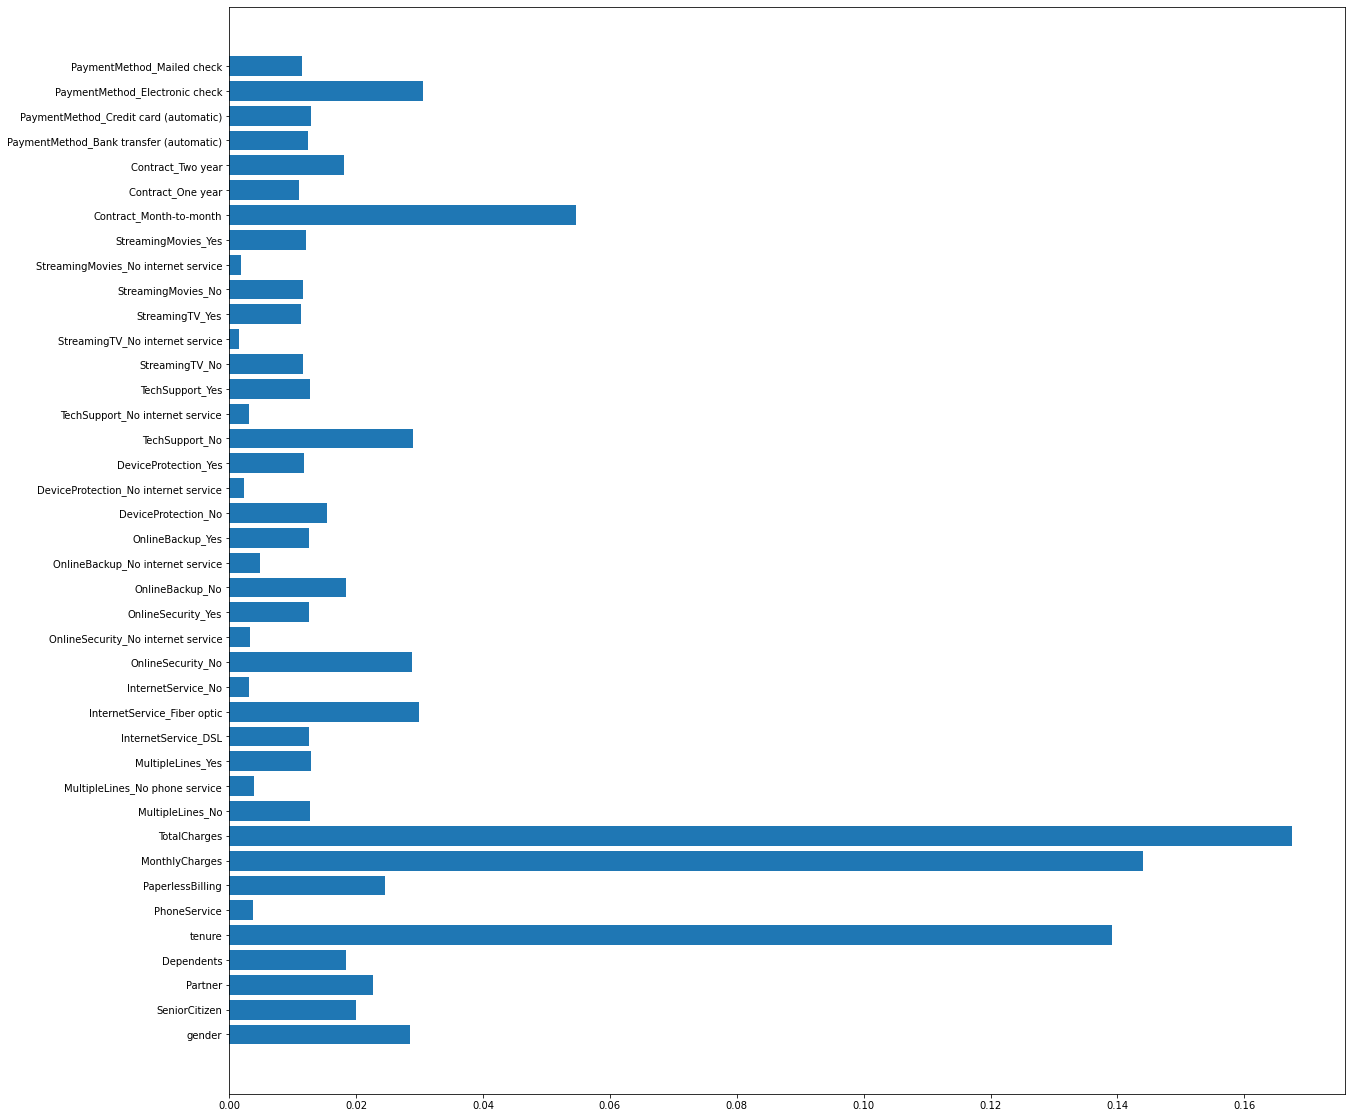

In [53]:
data_copy2 = data.copy()
data_copy2.drop(columns = {'Churn'}, inplace = True)
plt.figure(figsize = (20,20))
plt.barh(data_copy2.columns.tolist(),fi)

In [ ]:
# the above graphs shows that columns - 'StreamingMovies_No internet service', 'StreamingTV_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service', 'OnlineSecurity_No internet service', 'InternetService_No', 'MultipleLines_No phone service', 'PhoneService' have very less importance, so we will train a model by dropping these features (as we have did in Final Approach - 1)

## Approach No. 2

In [54]:
customer_id1 = data1['customerID'] #separating customerID column to avoid problems during scaling
data1.drop(columns = {'customerID'}, inplace = True)

In [55]:
training_data1 = data1.iloc[0:4000] #splitting data in training and test set
testing_data1 = data1.iloc[4001:]

In [56]:
training_data1_churn = training_data1['Churn'] #dropping target variable and storing it in a seprate dataframe
testing_data1_churn = testing_data1['Churn']
training_data1.drop(columns = {'Churn'},inplace = True)
testing_data1.drop(columns = {'Churn'},inplace = True)
testing_data1 = testing_data1[training_data1.columns]

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
training_data1['TotalCharges'].replace({r'^\s*$':np.nan},regex = True, inplace = True) #handling the empty string in training data
training_data1['TotalCharges'] = pd.to_numeric(training_data1['TotalCharges'])
training_data1['TotalCharges'].replace({np.nan:np.mean(training_data1['TotalCharges'])}, inplace = True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-57-44b976f5dcbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data1['TotalCharges'] = pd.to_numeric(training_data1['TotalCharges'])


In [58]:
testing_data1['TotalCharges'].replace({r'^\s*$':np.nan},regex = True, inplace = True) #handling the empty string in test data
testing_data1['TotalCharges'] = pd.to_numeric(testing_data1['TotalCharges'])
testing_data1['TotalCharges'].replace({np.nan:np.mean(testing_data1['TotalCharges'])}, inplace = True)

In [59]:
training_data1 = scaler.fit_transform(training_data1)
testing_data1 = scaler.transform(testing_data1)
# scaling training and test data

In [60]:
xgbc2 = XGBClassifier()
xgbc2.fit(training_data1, training_data1_churn)
yhat_xgbc2 = xgbc2.predict(testing_data1)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [94]:
print(accuracy_score(testing_data1_churn,yhat_xgbc2)) #Accuracy for approach_2

0.7784352399737016


In [61]:
rfc2 = RandomForestClassifier()
rfc2.fit(training_data1,training_data1_churn)
yhat_rfc2 = rfc2.predict(testing_data1)

In [93]:
print(accuracy_score(testing_data1_churn,yhat_rfc2)) #Accuracy for approach_2

0.7833662064431295


In [63]:
lr2 = LogisticRegression()
lr2.fit(training_data1,training_data1_churn)
yhat_lr2 = lr2.predict(testing_data1)

In [64]:
print(accuracy_score(testing_data1_churn,yhat_lr2)) #Accuracy for approach_2

0.8063773833004603


In [65]:
fi1 = rfc2.feature_importances_ #getting feature importance for our second approach 

In [66]:
data_copy3 = data1.copy()
data_copy3.drop(columns = {'Churn'}, inplace = True)

<BarContainer object of 28 artists>

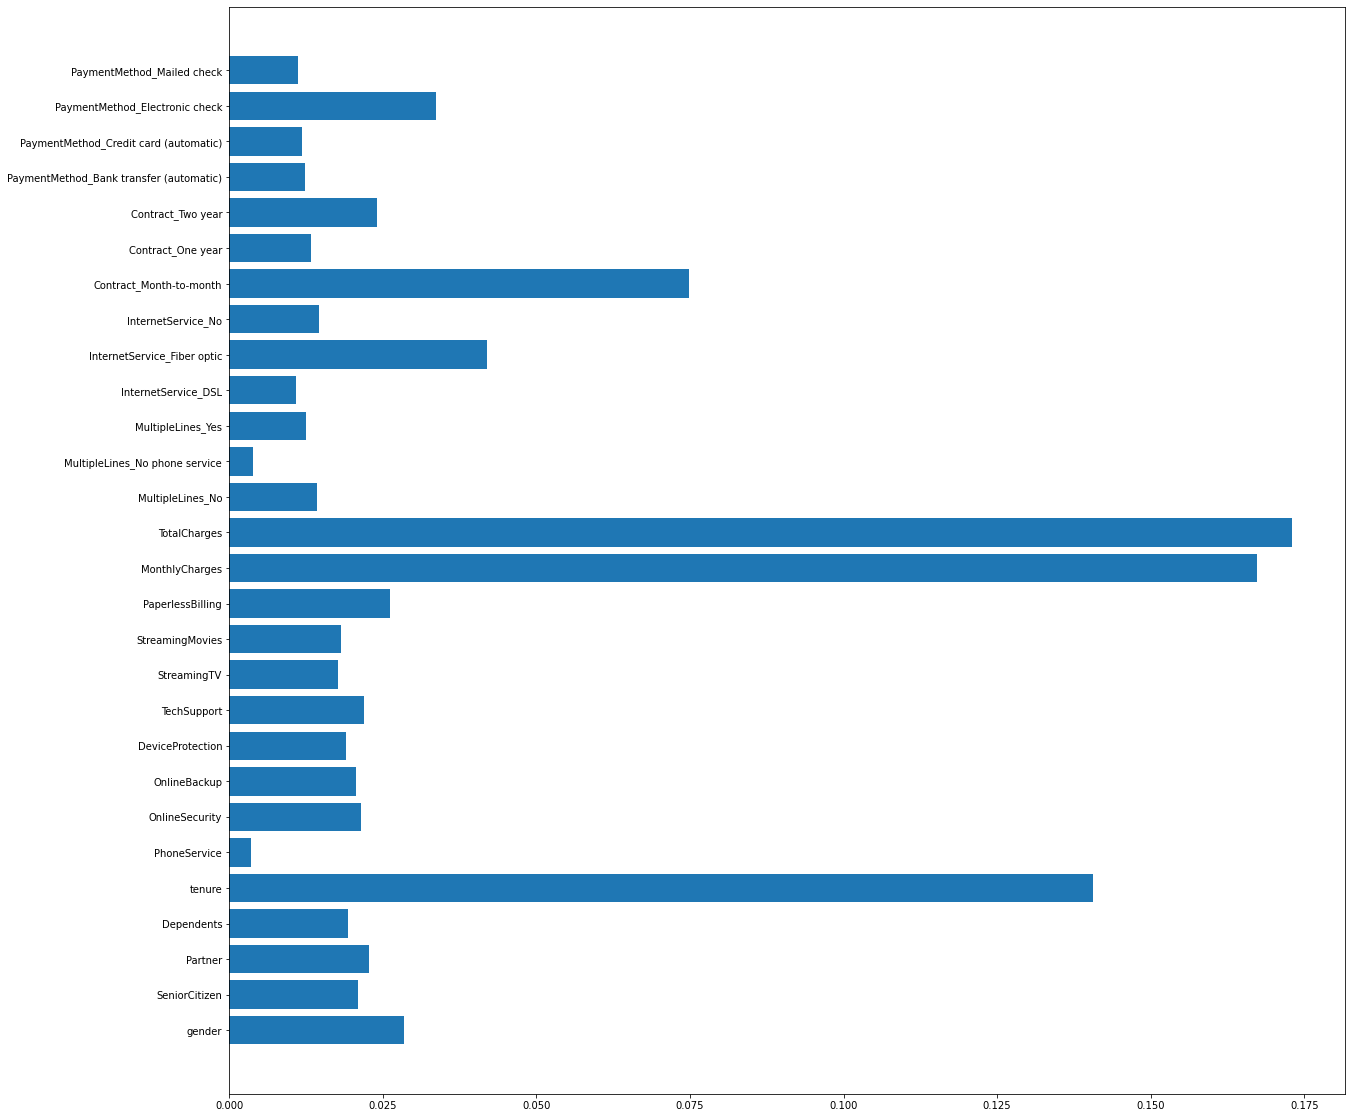

In [67]:
plt.figure(figsize = (20,20))
plt.barh(data_copy3.columns.tolist(),fi1)

In [ ]:
# as we can see from the graph above that features having less importance have decreased and only 'MultipleLines_No phone service', 'PhoneService' have less importance, so well will build a model after dropping these 2 features( as we did in Final Approach 2)

## Final model - Approach 1

In [68]:
training_data_final = data.iloc[0:4000] #splitting data in training and test set
testing_data_final = data.iloc[4001:]

In [69]:
training_data_final_churn = training_data_final['Churn']
testing_data1_final_churn = testing_data_final['Churn']
training_data_final.drop(columns = {'Churn'},inplace = True)
testing_data_final.drop(columns = {'Churn'},inplace = True)
testing_data_final = testing_data_final[training_data_final.columns]

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
training_data_final['TotalCharges'].replace({r'^\s*$':np.nan},regex = True, inplace = True) #handling the empty string in training data
training_data_final['TotalCharges'] = pd.to_numeric(training_data_final['TotalCharges'])
training_data_final['TotalCharges'].replace({np.nan:np.mean(training_data_final['TotalCharges'])}, inplace = True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-70-57bd5ba82f65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data_final['TotalCharges'] = pd.to_numeric(training_data_final['TotalCharges'])


In [71]:
testing_data_final['TotalCharges'].replace({r'^\s*$':np.nan},regex = True, inplace = True) #handling the empty string in test data
testing_data_final['TotalCharges'] = pd.to_numeric(testing_data_final['TotalCharges'])
testing_data_final['TotalCharges'].replace({np.nan:np.mean(testing_data_final['TotalCharges'])}, inplace = True)

In [72]:
training_data_final_copy = training_data_final.copy()
testing_data_final_copy = testing_data_final.copy()

In [73]:
training_data_final_copy.drop(columns = {'StreamingMovies_No internet service', 'StreamingTV_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service', 'OnlineSecurity_No internet service', 'InternetService_No', 'MultipleLines_No phone service', 'PhoneService'}, inplace = True)
testing_data_final_copy.drop(columns = {'StreamingMovies_No internet service', 'StreamingTV_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service', 'OnlineSecurity_No internet service', 'InternetService_No', 'MultipleLines_No phone service', 'PhoneService'}, inplace = True)

In [74]:
training_data_final_scaled = scaler.fit_transform(training_data_final_copy)
testing_data_final_scaled = scaler.transform(testing_data_final_copy)
# scaling training and test data

In [75]:
lr3_1 = LogisticRegression()
lr3_1.fit(training_data_final_scaled,training_data_final_churn)
yhat_lr3_1 = lr3_1.predict(testing_data_final_scaled)

In [76]:
print(accuracy_score(testing_data1_final_churn,yhat_lr3_1)) #Accuracy for final_approach_1

0.8060486522024983


In [77]:
rfc3_1 = RandomForestClassifier()
rfc3_1.fit(training_data_final_scaled,training_data_final_churn)
yhat_rfc3_1 = rfc3_1.predict(testing_data_final_scaled)

In [78]:
print(accuracy_score(testing_data1_final_churn,yhat_rfc3_1)) #Accuracy for final_approach_1

0.7853385930309007


## Final Model Approach 2

In [80]:
training_data_final_2= data1.iloc[0:4000] #splitting data in training and test set
testing_data_final_2 = data1.iloc[4001:]

In [81]:
training_data_final_2_churn = training_data_final_2['Churn']
testing_data_final_2_churn = testing_data_final_2['Churn']
training_data_final_2.drop(columns = {'Churn'},inplace = True)
testing_data_final_2.drop(columns = {'Churn'},inplace = True)
testing_data_final_2 = testing_data_final_2[training_data_final_2.columns]

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
training_data_final_2['TotalCharges'].replace({r'^\s*$':np.nan},regex = True, inplace = True) #handling the empty string in training data
training_data_final_2['TotalCharges'] = pd.to_numeric(training_data_final_2['TotalCharges'])
training_data_final_2['TotalCharges'].replace({np.nan:np.mean(training_data_final_2['TotalCharges'])}, inplace = True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-82-d7f9f66eb478>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data_final_2['TotalCharges'] = pd.to_numeric(training_data_final_2['TotalCharges'])


In [83]:
testing_data_final_2['TotalCharges'].replace({r'^\s*$':np.nan},regex = True, inplace = True) #handling the empty string in test data
testing_data_final_2['TotalCharges'] = pd.to_numeric(testing_data_final_2['TotalCharges'])
testing_data_final_2['TotalCharges'].replace({np.nan:np.mean(testing_data_final_2['TotalCharges'])}, inplace = True)

In [84]:
training_data_final_2_copy = training_data_final_2.copy()
testing_data_final_2_copy = testing_data_final_2.copy()

In [85]:
training_data_final_2_copy.drop(columns = {'MultipleLines_No phone service', 'PhoneService'}, inplace = True)
testing_data_final_2_copy.drop(columns = {'MultipleLines_No phone service', 'PhoneService'}, inplace = True)

In [86]:
training_data_final_2_scaled = scaler.fit_transform(training_data_final_2_copy)
testing_data_final_2_scaled = scaler.transform(testing_data_final_2_copy)
# scaling training and test data

In [87]:
lr3_2 = LogisticRegression()
lr3_2.fit(training_data_final_2_scaled,training_data_final_2_churn)
yhat_lr3_2 = lr3_2.predict(testing_data_final_2_scaled)

In [88]:
print(accuracy_score(testing_data_final_2_churn, yhat_lr3_2)) #Accuracy for final_approach_1

0.8063773833004603


### Model Evaluation

In [44]:
print(accuracy_score(testing_data_churn,yhat_xgbc1)) #Accuracy for xgbclassifier approach_1

0.7859960552268245


In [45]:
print(accuracy_score(testing_data_churn,yhat_rfc1)) #Accuracy for random forest classifier approach_1

0.7850098619329389


In [95]:
print(accuracy_score(testing_data_churn,yhat_lr1)) #Accuracy for logistic regressor approach_1

0.8050624589086127


In [89]:
print(accuracy_score(testing_data1_churn,yhat_xgbc2)) #Accuracy for xgboost classifier approach_2

0.7784352399737016


In [90]:
print(accuracy_score(testing_data1_churn,yhat_rfc2)) #Accuracy for random forest classifier approach_2

0.7833662064431295


In [96]:
print(accuracy_score(testing_data1_churn,yhat_lr2)) #Accuracy for logistic regressor approach_2

0.8063773833004603


since Logistic Regressor is giving the highest accuracy, hence for the final approach we will consider Logistic regressor only

In [97]:
print(accuracy_score(testing_data1_final_churn,yhat_lr3_1)) #Accuracy for final_approach_1

0.8060486522024983


In [98]:
print(accuracy_score(testing_data_final_2_churn, yhat_lr3_2)) #Accuracy for final_approach_2

0.8063773833004603


### Final Conclusions

As we can see that removing the non important features didn't decrease the accuracy of the model. It can be seen from the model importances that factors like Tenure, Charges, Tech support, online security, internet connection type and payment methods(particularly how easy it is to pay through the methods mentioned in the data) determine the churn more effectively than other factors, which makes sense because a customer only uses a particular services if it's - Cost effective (Charges), has good customer care support (tech-support), provides good security and good internet (online security and internet), and has easy payment options (payment)